In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import problem_description
%run problem_description.py  # my problem specs

# Verification Study
This analysis was performed on the Electronic Drug Delivery System (EDDS) with the following geometry, boundary conditions, and solver specifications. 

#### Operating Conditions
Boundary Conditions
- Inlet velocity: 0.630 [m s^-1]
- Outlet Pressure: 101.33 [kPa]
- Nonslip Walls

Solver Tolerance
- Residual Target: 1e-05 

System State
- Steady State

Fluid Type
- Air at room temperature (incompressible fluid)

In [2]:
print(geom_db,'\n',coil10)

        label  Diameter[mm]  Length[mm]  Thickness[mm]
0  Mouthpiece          8.02      13.960           0.13
1        Pipe          4.54      27.955           0.15
2    Atomizer          4.54       7.500           0.15
3  Inlet Pipe          4.54       2.170           0.15 
 {'Coil_qty': 10, 'Coil_Diameter': 0.3, 'Coil_Spacing': 0.5}


## Mesh Refinement Study

The System Response Quantity (SRQ) was collected at various spatial locations throughout the geometry: inlet pipe(tube), near coil 1, between coils 3&4, near coil 5, near coil 10, pipe(tube), mouthpiece (MP), 1mm above the mouthpiece (1mm), and at the outlet. 

At each of these locations 10 meshses were run under the same operating condition with the only change being that the mesh element size has changed. See the following tables: 

In [3]:
df_meshrefinement_all = pd.read_csv("data/meshrefinement/dataset_refinement.csv") 
df_meshrefinement_trans = df_meshrefinement_all.transpose()
totalnodes = df_meshrefinement_trans[9][0:]
totalelements = df_meshrefinement_trans[10][0:]
df_meshrefinement = df_meshrefinement_all[0:9]
df_meshrefinement_all

,Unnamed: 0,M2/COARSE (element size: 0.0004),M3(element size: 0.0003),M3-1(element size: 0.00028),M3-2(element size: 0.00026),M3-3(element size: 0.00024),M3-4(element size: 0.00022),M4(element size: 0.0002),M4-1(element size: 0.00018),M4-2 (element size: 0.00016),M4-3/Fine(element size: 0.00014)
0,Outlet,4.484671e-01,4.800676e-01,4.873589e-01,4.858746e-01,4.865588e-01,4.859233e-01,4.849308e-01,4.813828e-01,4.783957e-01,4.755047e-01
1,1mm,9.016487e-01,9.635749e-01,9.714138e-01,9.743835e-01,9.788875e-01,9.808701e-01,9.830303e-01,9.811468e-01,9.814316e-01,9.820649e-01
2,MP,9.233295e-01,9.813662e-01,9.893265e-01,9.928494e-01,9.985443e-01,1.000302e+00,9.999403e-01,9.995162e-01,9.995657e-01,9.999798e-01
3,Tube,1.162059e+00,1.206886e+00,1.213577e+00,1.220233e+00,1.230039e+00,1.235835e+00,1.238662e+00,1.238619e+00,1.242038e+00,1.243183e+00
4,Coil 10,1.152307e+00,1.170609e+00,1.191050e+00,1.186760e+00,1.216129e+00,1.214511e+00,1.211016e+00,1.209528e+00,1.218649e+00,1.218339e+00
5,Coil 5,1.038885e+00,1.037315e+00,1.060804e+00,1.060804e+00,1.086819e+00,1.085181e+00,1.082789e+00,1.082686e+00,1.091989e+00,1.091465e+00
6,Btw Coil 3&4,9.787686e-01,9.863194e-01,1.000189e+00,9.999270e-01,9.863194e-01,9.863194e-01,1.026365e+00,1.026517e+00,1.035630e+00,1.035253e+00
7,Coil 1,7.945878e-01,8.125972e-01,8.185800e-01,8.196206e-01,8.379161e-01,8.385749e-01,8.397941e-01,8.410130e-01,8.468197e-01,8.474839e-01
8,Inlet Tube,6.719043e-01,6.772097e-01,6.790539e-01,6.796046e-01,6.841289e-01,6.846313e-01,6.853775e-01,6.860075e-01,6.876990e-01,6.879202e-01
9,Total Nodes,3.621110e+05,7.543010e+05,9.097190e+05,1.115206e+06,1.395877e+06,1.787027e+06,2.354237e+06,3.193041e+06,4.500121e+06,6.663568e+06


In [4]:
totalelements = np.array(df_meshrefinement_trans[10][1:])
elemsize = [0.0004,0.0003,0.00028,0.00026,0.00024,0.00022,0.0002,0.00018,0.00016,0.00014]
column_values = ['M2','M3','M3-1','M3-2','M3-3','M3-4','M4','M4-1','M4-2','M4-3']
index_values = ['Element Size','Total Elements']
# creating the dataframe
meshref_df = pd.DataFrame(data = [elemsize,totalelements], 
                  index = index_values, 
                  columns = column_values)
meshref_df.transpose()

,Element Size,Total Elements
M2,0.00040,1723087.0
M3,0.00030,3993266.0
M3-1,0.00028,4897382.0
M3-2,0.00026,6096385.0
M3-3,0.00024,7735148.0
M3-4,0.00022,10022241.0
M4,0.00020,13328905.0
M4-1,0.00018,18250030.0
M4-2,0.00016,25940033.0
M4-3,0.00014,38678387.0


### Calculate Order of Convergence

In [5]:
# Geometry Volume
edds_volume = 3911.381 # mm
# Simulation Results Data 
df_meshrefinement_1mm = pd.read_csv("data/meshrefinement/dataset_refinement1mm.csv") 
df_meshrefinement_1mm_trans = df_meshrefinement_1mm.transpose()
y1mm = np.array(df_meshrefinement_1mm_trans[10][0:])
maxmeshrefinement1mm = np.array([np.max(df_meshrefinement_1mm_trans[0][1:]),np.max(df_meshrefinement_1mm_trans[1][1:]),np.max(df_meshrefinement_1mm_trans[2][1:]),np.max(df_meshrefinement_1mm_trans[3][1:]),np.max(df_meshrefinement_1mm_trans[4][1:]),np.max(df_meshrefinement_1mm_trans[5][1:]),np.max(df_meshrefinement_1mm_trans[6][1:]),np.max(df_meshrefinement_1mm_trans[7][1:]),np.max(df_meshrefinement_1mm_trans[8][1:]),np.max(df_meshrefinement_1mm_trans[9][1:])])
maxmeshrefinement1mmERR= np.array([np.abs(np.max(df_meshrefinement_1mm_trans[0][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[1][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[2][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[3][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[4][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[5][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[6][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[7][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[8][1:])-np.max(df_meshrefinement_1mm_trans[9][1:])),np.abs(np.max(df_meshrefinement_1mm_trans[9][1:])-np.max(df_meshrefinement_1mm_trans[9][1:]))])
# Total Mesh Elements
mesh1,mesh2,mesh3,mesh4_3 = totalelements[0],totalelements[1],totalelements[6],totalelements[9]
####### Choose one of the Mesh combos 
#------------
# # For Mesh1,Mesh2,Mesh3
# h3 = edds_volume/mesh1    
# h2 = edds_volume/mesh2   
# h1 = edds_volume/mesh3  
# srq3 = maxmeshrefinement1mm[0] # Mesh1
# srq2 = maxmeshrefinement1mm[1] # Mesh2
# srq1 = maxmeshrefinement1mm[6] # Mesh3
#------------
# For Mesh2,Mesh3,Mesh4_3
h3 = edds_volume/mesh2    
h2 = edds_volume/mesh3   
h1 = edds_volume/mesh4_3  
srq3 = maxmeshrefinement1mm[1] # Mesh2
srq2 = maxmeshrefinement1mm[6] # Mesh3
srq1 = maxmeshrefinement1mm[9] # Mesh4_3
#------------
r21 = h2/h1
r32 = h3/h2
e32 = srq3 - srq2
e21 = srq2 - srq1
s = np.sign(e32/e21)

In [6]:
### Calculate the Observed Order of Convervgence based on ASME V&V 20 (2-4.1 pg 13)
def f1(q_p, e32, e21, r21):
    return (1/np.log(r21))*np.log(np.abs(e32/e21)) + q_p

def f2(p, r21, r32, s):
    return np.log(((r21**p) - s)/((r32**p) - s))

def f3(e32, e21):
    return np.sign(e32/e21)
# Initial guess
q_p0 = 0
# Fixed-point iteration
p = f1(q_p0,e32,e21,r21)
for _ in range(100):  # Maximum number of iterations
    q_p = f2(p, r21, r32, s)
    p_new = f1(q_p, e32, e21, r21)
    if abs(p_new - p) < 1e-6:  # Convergence criterion
        break
    p = p_new

# Print the result
print("Observed p = ", p)

Observed p =  2.405700748987999


In [7]:
# Extrapolated Value used for Error Estimation
srq_extrap = ((r21**p)*srq1 - srq2)/((r21**p) -1) # Extrapolated SRQ
e21a = np.abs(srq1-srq2)
e21extrapolated = np.abs((srq_extrap-srq1)/(srq_extrap))
srq_extrap

0.9819988413847612

In [8]:
# Calculate the CGI
Fs = 3  # Factor of Safety 3 to 1.25 where 3 is more conservative
k = 2
CGI_21_fine = (Fs * e21a)/((r21**p)-1)
u_num = CGI_21_fine/k
print("U_num = CGI with a 95% confidence interval = {:.2e}".format(CGI_21_fine))
print("u_num = U_num/(k=2) = {:.2e}".format(u_num))

U_num = CGI with a 95% confidence interval = 2.69e-04
u_num = U_num/(k=2) = 1.34e-04


In [9]:
### Errors by comparing with finest mesh
# discrErr1mm   = np.array(df_meshrefinement_trans[1][1:]-df_meshrefinement_trans[1][1:][-1])
# discrErrMp    = np.array(df_meshrefinement_trans[2][1:]-df_meshrefinement_trans[2][1:][-1])
# discrErrInlet = np.array(df_meshrefinement_trans[8][1:]-df_meshrefinement_trans[8][1:][-1])

#### Errors by comparing with Extrapolated GCI
##### srq_extrap is calcualted in GCI
meshvsmesh = np.array(df_meshrefinement_trans[1][1:]-df_meshrefinement_trans[1][1:][-1])
discrErr1mm   = np.array(df_meshrefinement_trans[1][1:]-srq_extrap)
discrErrMp    = np.array(df_meshrefinement_trans[2][1:]-srq_extrap)
discrErrInlet = np.array(df_meshrefinement_trans[8][1:]-srq_extrap)
discrErr1mm

array([-0.08035014118476125, -0.018423955084761245, -0.010585050184761191,
       -0.00761530838476121, -0.003111342984761234,
       -0.0011287136847611956, 0.0010314778152387127,
       -0.000852088584761268, -0.0005672379847612152,
       6.606141523879394e-05], dtype=object)

In [10]:
# elemsizeSome = np.array([0.0004,0.0003,0.0002]) #,0.00018,0.00016,0.00014]
# Meshes: M2 (coarsest), M3, M4, M4-3 (finest)
totalelementsSome = np.array([totalelements[0],totalelements[1],totalelements[6],totalelements[9]]) #,totalelements[8]])
discrErr1mmSome = np.array([discrErr1mm [0],discrErr1mm [1],discrErr1mm [6],discrErr1mm [9]]) #,discrErr1mm [8]])
discrErrMpSome = np.array([discrErrMp [0],discrErrMp [1],discrErrMp [6]]) #,discrErrMp [8]])
discrErrInletSome = np.array([discrErrInlet [0],discrErrInlet [1],discrErrInlet [6]]) #,discrErrInlet [8]])

# Meshes: M3,M3-1,M3-2,M3-3,M3-4
# totalelementsSome = np.array([totalelements[1], totalelements[2],totalelements[3],totalelements[4] ,totalelements[5]     ]) #,totalelements[8]])
# discrErr1mmSome = np.array([  discrErr1mm[1]  , discrErr1mm[2]  ,discrErr1mm [3] ,discrErr1mm [4]  ,discrErr1mm [5]      ]) #,discrErr1mm [8]])
# discrErrMpSome = np.array([   discrErrMp[1]   , discrErrMp[2]   ,discrErrMp [3]  ,discrErrMp [4]   ,discrErrMp [5]       ]) #,discrErrMp [8]])
# discrErrInletSome = np.array([discrErrInlet[1], discrErrInlet[2],discrErrInlet [3],discrErrInlet [4],discrErrInlet [5]   ]) #,discrErrInlet [8]])

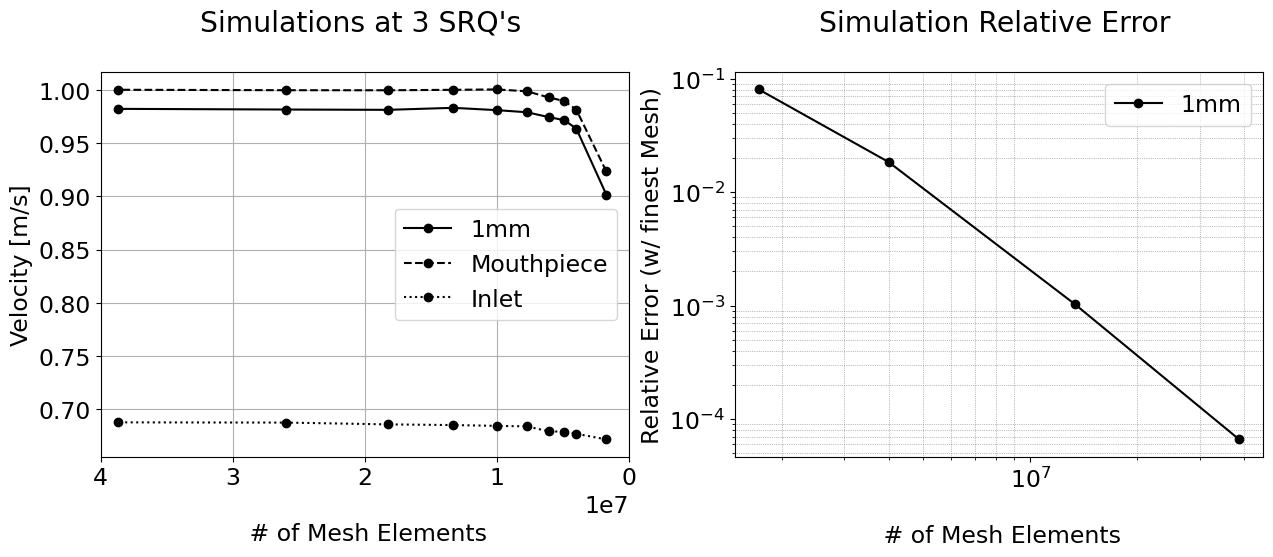

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel('\n # of Mesh Elements')
plt.ylabel('Velocity [m/s]')
plt.title('Simulations at 3 SRQ\'s \n')
plt.plot(totalelements,df_meshrefinement_trans[1][1:],'-ok', label='1mm')
plt.plot(totalelements,df_meshrefinement_trans[2][1:],'ok--', label='Mouthpiece')
plt.plot(totalelements,df_meshrefinement_trans[8][1:],'ok:', label='Inlet')
plt.xlim(4e7, 0)
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('\n # of Mesh Elements')
plt.ylabel('Relative Error (w/ finest Mesh)')
plt.title('Simulation Relative Error \n')
plt.grid(which='both') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.loglog(totalelementsSome,np.abs(discrErr1mmSome  ) ,'-ok', label='1mm')
plt.legend()
plt.grid()
# plt.savefig('images/simulation_meshes.png', dpi=300)

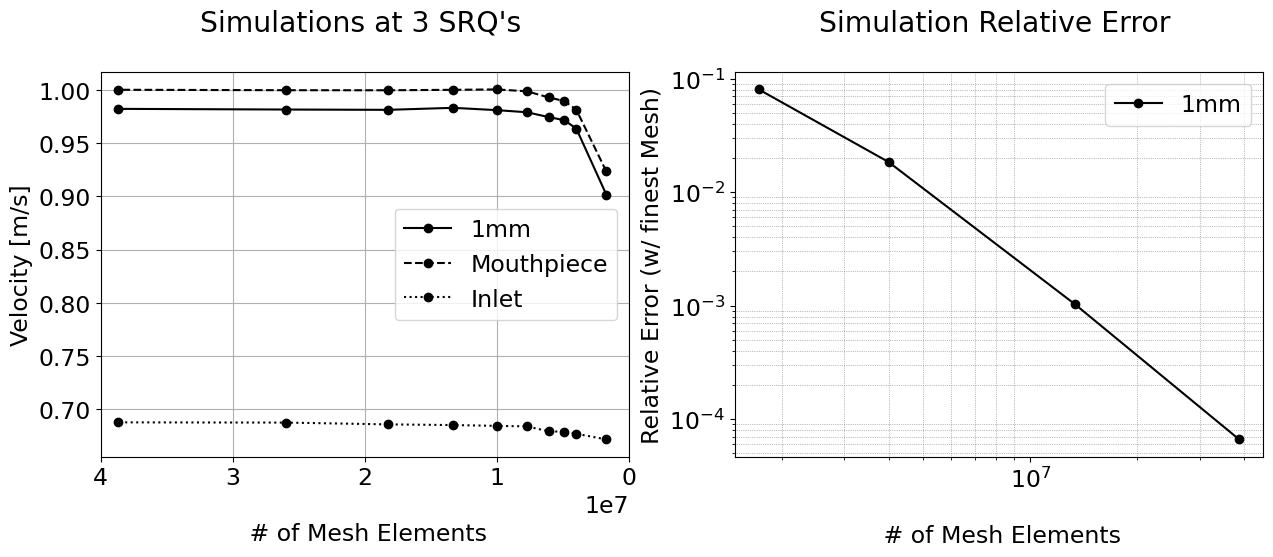

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel('\n # of Mesh Elements')
plt.ylabel('Velocity [m/s]')
plt.title('Simulations at 3 SRQ\'s \n')
plt.plot(totalelements,df_meshrefinement_trans[1][1:],'-ok', label='1mm')
plt.plot(totalelements,df_meshrefinement_trans[2][1:],'ok--', label='Mouthpiece')
plt.plot(totalelements,df_meshrefinement_trans[8][1:],'ok:', label='Inlet')
plt.xlim(4e7, 0)
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('\n # of Mesh Elements')
plt.ylabel('Relative Error (w/ finest Mesh)')
plt.title('Simulation Relative Error \n')
plt.loglog(totalelementsSome,np.abs(discrErr1mmSome  ) ,'-ok', label='1mm')
plt.grid(which='both') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.legend()
plt.grid()
# plt.savefig('images/simulation_meshes.png', dpi=300)

In [13]:
# For attaining slope of the line of error points
log_x = np.log(totalelementsSome[0:])
log_y = np.log(np.abs(discrErr1mmSome[0:]))
slope, intercept = np.polyfit(log_x, log_y, 1)
# Print the slope and new intercepts
print("Slope of the line in log-log space:", slope, intercept)

Slope of the line in log-log space: -2.3050370636378728 30.801285835232108


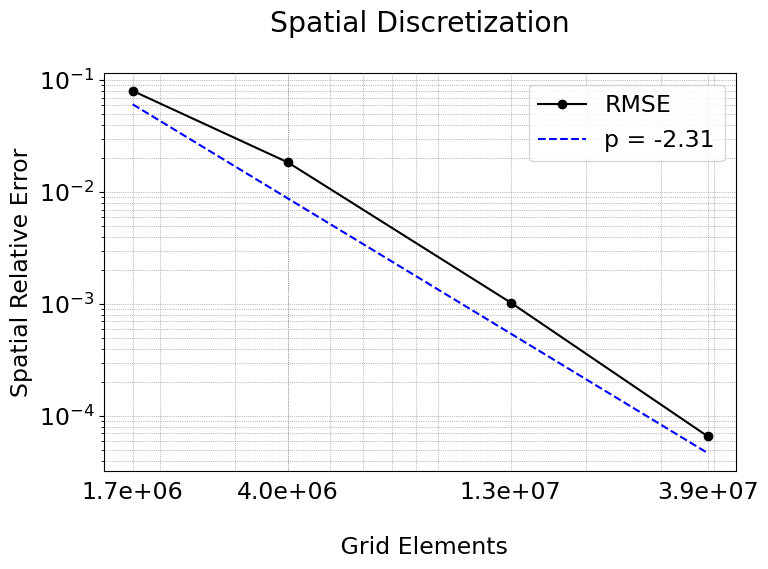

In [14]:
plt.figure(figsize=(8, 6))
plt.xlabel('\n # of Elements')
plt.ylabel('Max Velocity [m/s]')
plt.title('Simulation \n')
plt.xlabel('\n Grid Elements')
plt.ylabel('Spatial Relative Error')
plt.title('Spatial Discretization\n ')
plt.loglog(totalelementsSome, np.abs(discrErr1mmSome  ) ,'-ko', label='RMSE')
plt.xticks(totalelementsSome, ['{:.0e}'.format(x) for x in totalelementsSome])
plt.loglog(totalelementsSome, np.exp(intercept-0.50) * totalelementsSome**slope, '--b', label=f'p = {slope:.3g}')  # Plot the fitted line
tick_values = totalelementsSome
tick_labels = ['{:,.1e}'.format(x) for x in totalelementsSome]
plt.xticks(tick_values, tick_labels)
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)
# plt.scatter(7735148,  0.0038, marker='x',color='red',s=200,linewidth=2) # Marker at Mesh 3-3
plt.grid(which='both', linestyle=':', linewidth='0.5', color='gray')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('figures/simulation_elativeERROR.png', dpi=300)
plt.show()

## Calcualte Richardson Extrapolation
This isn't correct. Use instead the CGI extrapolated value. 

In [15]:
def richardson_extrapolation(errors, element_sizes, order):
    k = 2 
    m = order  
    richardson_extrapo = (k**m * errors[1] - errors[0]) / (k**m - 1)
    richardson_element_size = element_sizes[0] / k
    return richardson_extrapo, richardson_element_size

# srq = np.array([0.98303032,0.96357489,0.9016487]) # not errors but the SRQ Vel
srq = np.array([srq1,srq2,srq3])
# element_sizes = np.array([13328905, 3993266, 1723087 ])
element_sizes = np.array([h1,h2,h3])
order_of_convergence = p

richardson_extrapo, richardson_element_size = richardson_extrapolation(srq, element_sizes, order_of_convergence)
print("Richardson extrapolation:", richardson_extrapo)
print("Element size for the extrapolated estimate:", richardson_element_size)

Richardson extrapolation: 0.9834099590174874
Element size for the extrapolated estimate: 5.05628763681381e-05


### Plot the Mesh Resolution w/ a focus on the Max

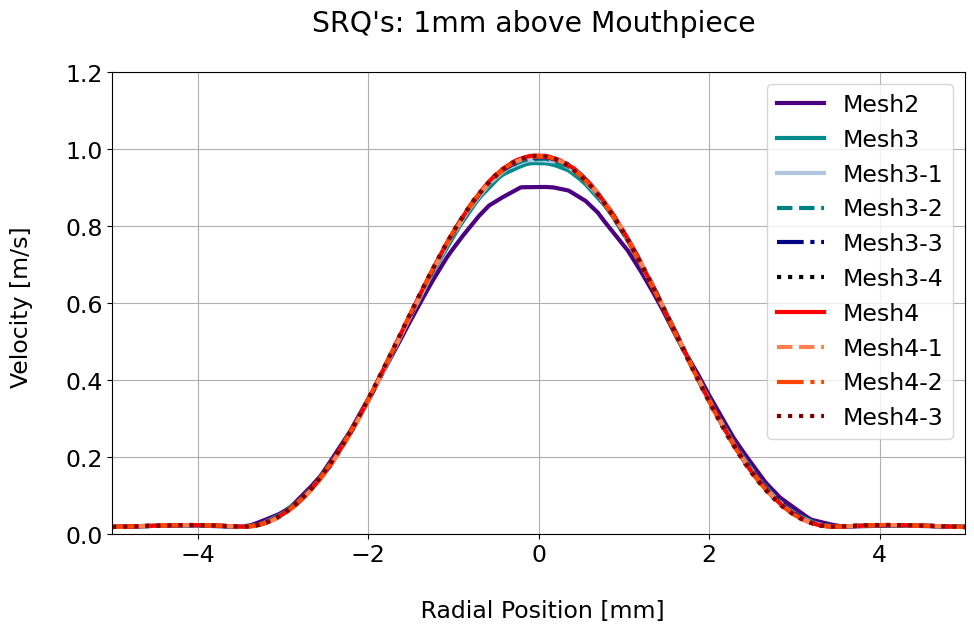

In [20]:
plt.figure(figsize=(11,6))
plt.xlabel('\n Radial Position [mm]')
plt.ylabel('Velocity [m/s] \n')
plt.title('SRQ\'s: 1mm above Mouthpiece \n')
plt.axis([-5,5,0,1.2])
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[0][1:],'-',color='indigo', label='Mesh2',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[1][1:],'-',color='darkcyan', label='Mesh3',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[2][1:],'-',color='lightsteelblue', label='Mesh3-1',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[3][1:],'--',color='teal', label='Mesh3-2',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[4][1:],'-.',color='navy', label='Mesh3-3',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[5][1:],':',color='black', label='Mesh3-4',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[6][1:],'-', color='red', label='Mesh4',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[7][1:],'--', color='coral', label='Mesh4-1',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[8][1:],'-.', color='orangered', label='Mesh4-2',linewidth=3)
plt.plot(y1mm[1:]*1e3,df_meshrefinement_1mm_trans[9][1:],':', color='maroon', label='Mesh4-3',linewidth=3)
plt.legend()
plt.grid()
# plt.savefig('figures/simulation_meshes_diameter.png', dpi=300)

In [24]:
len(maxmeshrefinement1mm)

10

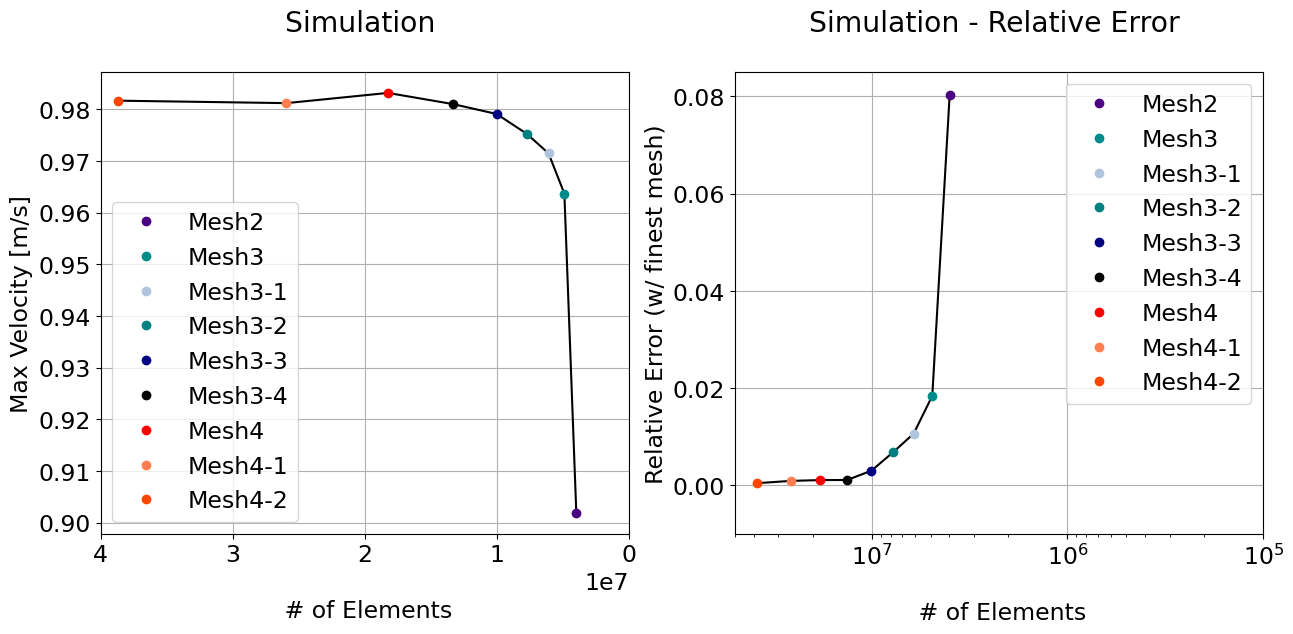

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.xlabel('\n # of Elements')
plt.ylabel('Max Velocity [m/s]')
plt.title('Simulation \n')
plt.plot(totalelements[1:],maxmeshrefinement1mm[0:9],color='black')
plt.plot(totalelements[1],maxmeshrefinement1mm[0],'o',color='indigo', label='Mesh2',linewidth=3)
plt.plot(totalelements[2],maxmeshrefinement1mm[1],'o',color='darkcyan', label='Mesh3',linewidth=3)
plt.plot(totalelements[3],maxmeshrefinement1mm[2],'o',color='lightsteelblue', label='Mesh3-1',linewidth=3)
plt.plot(totalelements[4],maxmeshrefinement1mm[3],'o',color='teal', label='Mesh3-2',linewidth=3)
plt.plot(totalelements[5],maxmeshrefinement1mm[4],'o',color='navy', label='Mesh3-3',linewidth=3)
plt.plot(totalelements[6],maxmeshrefinement1mm[5],'o',color='black', label='Mesh3-4',linewidth=3)
plt.plot(totalelements[7],maxmeshrefinement1mm[6],'o', color='red', label='Mesh4',linewidth=3)
plt.plot(totalelements[8],maxmeshrefinement1mm[7],'o', color='coral', label='Mesh4-1',linewidth=3)
plt.plot(totalelements[9],maxmeshrefinement1mm[8],'o', color='orangered', label='Mesh4-2',linewidth=3)
plt.xlim(4e7, 0)
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('\n # of Elements')
plt.ylabel('Relative Error (w/ finest mesh)')
plt.title('Simulation - Relative Error \n')
plt.plot(totalelements[1:],maxmeshrefinement1mmERR[0:9],color='black')
plt.semilogx(totalelements[1],maxmeshrefinement1mmERR[0],'o',color='indigo', label='Mesh2',linewidth=3)
plt.semilogx(totalelements[2],maxmeshrefinement1mmERR[1],'o',color='darkcyan', label='Mesh3',linewidth=3)
plt.semilogx(totalelements[3],maxmeshrefinement1mmERR[2],'o',color='lightsteelblue', label='Mesh3-1',linewidth=3)
plt.semilogx(totalelements[4],maxmeshrefinement1mmERR[3],'o',color='teal', label='Mesh3-2',linewidth=3)
plt.semilogx(totalelements[5],maxmeshrefinement1mmERR[4],'o',color='navy', label='Mesh3-3',linewidth=3)
plt.semilogx(totalelements[6],maxmeshrefinement1mmERR[5],'o',color='black', label='Mesh3-4',linewidth=3)
plt.semilogx(totalelements[7],maxmeshrefinement1mmERR[6],'o', color='red', label='Mesh4',linewidth=3)
plt.semilogx(totalelements[8],maxmeshrefinement1mmERR[7],'o', color='coral', label='Mesh4-1',linewidth=3)
plt.semilogx(totalelements[9],maxmeshrefinement1mmERR[8],'o', color='orangered', label='Mesh4-2',linewidth=3)
plt.xlim(5e7, 1e5)
plt.ylim(-0.01, 0.085)
plt.legend()
plt.grid()
# plt.savefig('figures/simulation_meshes_refinement.png', dpi=300)